Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your collaborators below:

In [1]:
COLLABORATORS = ""

---

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# special imports for running k-means 
from k_means_clustering import init_centers, k_means, plot_final

<div class='alert alert-success'>In this problem, we will use $k$-means clustering on a dataset consisting of observations of dogs, cats, and mops. You can consult AIMA3, pages 816-824, or AIMA2, pages 724-733 for help.</div>

An example observation from the categories cat, dog, and mop are presented below:
![](images/test.png)
We assume each observation can be represented as a pair of ($x,y$) coordinates, i.e., each object is represented in two-dimensional space. Suppose we have observed some obserations from each type of object, but have lost the information as to which instance belongs to which type!

To try and recover this information we will use an unsupervised learning algorithm called _k-means clustering_. As you may recall from lecture, the $k$ here refers to how many types of clusters we think exist in the data, and the goal of the algorithm is to assign labels to the data points using their distance to the centers (or means) of the clusters. For this particular problem, we assume $k=3$. After randomly initializing cluster centers,
the algorithm can be broken down into two alternating steps: 

1. Update the label assignments of the data points based on the nearest cluster centers
2. Update the positions of the cluster centers to reflect the updated assignments of data points.

Before you begin, load the data we will be using. For answering the questions in this problem set, use the `centers` loaded from the `X.npz`  file below (i.e., do NOT randomly initialize the values yourself - the autograder for this problem relies on a "stock" initialization).

<div class="alert alert-warning">
**N.B.** we use non-random initializations for the cluster centers to make autograding feasible; normally cluster centers would be randomly initialized. 
</div>

In [3]:
data = np.load('data/X.npz')
X = data['X']
centers = data['centers'] 

print ('X: \n' + str(X))
print ('\ncenters: \n' + str(centers))

X: 
[[ 3.17014624  2.42738134]
 [ 3.10945591  1.90239505]
 [ 2.96418311  1.82748366]
 [ 2.91461687  1.88794482]
 [ 3.51445266  2.17859409]
 [ 2.90636624  1.67106719]
 [ 2.9524492   2.15678052]
 [ 2.7653169   1.66717629]
 [ 2.79663441  1.96728796]
 [ 2.85409531  1.54327596]
 [ 3.63398062  2.9905047 ]
 [ 3.67321618  2.9501688 ]
 [ 3.32811256  3.22041747]
 [ 3.57939394  2.98596398]
 [ 3.54071059  2.78969028]
 [ 3.78977898  2.96128904]
 [ 3.53209701  3.29714867]
 [ 3.75986453  2.89627318]
 [ 3.47080721  2.83534581]
 [ 3.33792577  3.24599767]
 [ 3.02530687  3.60834344]
 [ 2.90932354  4.26426491]
 [ 2.81529304  3.85310555]
 [ 2.6300394   4.0755554 ]
 [ 3.03834294  4.0548656 ]
 [ 2.92074563  3.78044972]
 [ 3.07972956  3.28465006]
 [ 2.63586335  4.13388882]
 [ 3.33045863  3.91449067]
 [ 3.12180098  3.85053529]]

centers: 
[[ 4.02596083  2.52095016]
 [ 3.07295517  3.6180417 ]
 [ 2.10083931  2.40466689]]


Also, take a look at the imported functions `k_means`:

In [4]:
k_means??

This is the function you will run in Part C once you have completed the helper functions in parts A and B. 

---

## Part A (2 points)

First, we will need a function that gives us the distance between two points. We can use _Euclidean distance_ to compute the distance between two points ($x_1,y_1$) and ($x_2,y_2$). Recall that Euclidean distance in $\mathbb{R}^2$ is calculated as:

$$
distance((x_1,y_1),(x_2,y_2)) = \sqrt{(x_1 - x_2)^{2} + (y_1 - y_2)^{2}}
$$

<div class="alert alert-success">
Complete the `distance` function below to calculate the euclidean distance between two points in $\mathbb{R}^2$.
</div>

In [5]:
def distance(a, b):
    """
    Returns the Euclidean distance between two points, 
    a and b, in R^2.
    
    Parameters
    ----------
    a, b : numpy arrays of shape (2,)
        The (x,y) coordinates for two points, a and b, 
        in R^2. E.g., a[0] is the x coordinate, 
        and a[1] is the y coordinate.
            
    Returns
    -------
    distance : float
        The Euclidean distance between a and b
    """
    # YOUR CODE HERE
    
    return np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)

In [6]:
# add your own test cases here!


In [7]:
"""Check distances computes the correct values"""
from numpy.testing import assert_allclose

assert_allclose(distance(np.array([0.0, 0.0]), np.array([0.0, 1.0])), 1.0)
assert_allclose(distance(np.array([3.0, 3.0]), np.array([4.3, 5.0])), 2.3853720883753127)
assert_allclose(distance(np.array([130.0, -25.0]), np.array([0.4, 15.0])), 135.63244449614552)

print("Success!")

Success!


<div class="alert alert-success">Now, we will write a function to update the cluster that each point is assigned to by computing the distance to the center of each cluster. Complete the `update_assignments` function to do this using your `distances` function.</div>

In [8]:
def update_assignments(num_clusters, X, centers):
    """
    Returns the cluster assignment (number) for each data point 
    in X, computed as the closest cluster center.
    
    Parameters
    ----------
    num_clusters : int
        The number of disjoint clusters (i.e., k) in 
        the X
    
    X : numpy array of shape (m, 2)
        An array of m data points in R^2.
    
    centers : numpy array of shape (num_clusters, 2)
        The coordinates for the centers of each cluster
        
    Returns
    -------
    cluster_assignments : numpy array of shape (m,)
        An array containing the cluster label assignments 
        for each data point in X. Each cluster label is an integer
        between 0 and (num_clusters - 1). 
    """
    # YOUR CODE HERE
    distances = []
    for d in X:
        lst = []
        for c in centers:
            lst.append(distance(d,c))
        distances.append(lst.index(np.min(lst)))
    return np.array(distances)

In [9]:
# add your own test cases here!


In [10]:
"""Check update_assignments computes the correct values"""
from nose.tools import assert_equal
from numpy.testing import assert_array_equal

# load the data
data = np.load('data/X.npz')
X = data['X']

# validate update_assignments using different values
actual = update_assignments(2, X, np.array([[3, 2], [1, 4]]))
expected = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0])

# is the output of the correct shape?
assert_equal(actual.shape[0], X.shape[0])

# are the cluster labels correct?
assert_array_equal(expected, actual)

# validate update_assignments using different values
actual = update_assignments(3, X[:int(X.shape[0]/2)], np.array([X[0], X[1], X[2]]))
expected = np.array([0, 1, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0])

# is the output of the correct shape?
assert_equal(actual.shape[0], X.shape[0] / 2)

# are the cluster labels correct?
assert_array_equal(expected, actual)

# check that it uses distance
old_distance = distance
del distance
try:
    update_assignments(2, X, np.array([[3, 2], [1, 4]]))
except NameError:
    pass
else:
    raise AssertionError("update_assignments does not call distance")
finally:
    distance = old_distance
    del old_distance

print("Success!")

Success!


---
## Part B (1.5 points)

<div class="alert alert-success">Now, we need to do the next step of the clustering algorithm: recompute the cluster centers based on which points are assigned to that cluster. Recall that the new centers are simply the two-dimensional means of each group of data points. A two-dimensional mean is calculated by simply finding the mean of the x coordinates and the mean of the y coordinates. Complete the `update_parameters` function to do this.</div>

In [11]:
def update_parameters(num_clusters, X, cluster_assignment):
    """
    Recalculates cluster centers running update_assignments.
    
    Parameters
    ----------
    num_clusters : int
        The number of disjoint clusters (i.e., k) in 
        the X
    
    X : numpy array of shape (m, 2)
        An array of m data points in R^2
    
    cluster_assignment : numpy array of shape (m,)
        The array of cluster labels assigned to each data 
        point as returned from update_assignments
    
    Returns
    -------
    updated_centers : numpy array of shape (num_clusters, 2)
        An array containing the new positions for each of 
        the cluster centers
    """
    # YOUR CODE HERE
    update_centers = np.zeros([num_clusters, 2])
    updatex = np.zeros([num_clusters, len(X)])
    updatey = np.zeros([num_clusters, len(X)])
    
    #strip x and y values
    xs = []
    ys = []
    for i in X:
        xs.append(i[0])
        ys.append(i[1])
    
    #get cluster assignments and sort
    n = 0
    while n <= num_clusters:
        i = 0
        while i < len(cluster_assignment):
            if cluster_assignment[i] == n:
                updatex[n][i] = xs[i]
                updatey[n][i] = ys[i]
            i = i+1
        n = n+1  
        
    #remove zeros out of x,y coordinate arrays, take sums and update centers
    j=0
    while j < len(updatex):
        sumx = []
        sumy = []
        for x in updatex[j]:
            if x != 0:
                sumx.append(x)
        for y in updatey[j]:
            if y != 0:
                sumy.append(y)
        update_centers[j] = (np.mean(sumx), np.mean(sumy))
        j = j+1
    return update_centers

In [12]:
# add your own test cases here!


In [13]:
"""Check update_parameters computes the correct values"""
from nose.tools import assert_equal
from numpy.testing import assert_allclose

# load the data
data = np.load('data/X.npz')
X = data['X']

# validate update_assignments using different values
cluster_assignment1 = np.array([
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0])
actual = update_parameters(2, X, cluster_assignment1)
expected = np.array([[ 3.24286584,  2.71362623], [ 2.80577245,  4.07633606]])
assert_allclose(expected, actual)

cluster_assignment2 = np.array([0, 1, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0])
actual = update_parameters(3, X[:int(X.shape[0]/2)], cluster_assignment2)
expected = np.array([[ 3.4914304 ,  2.79181724], [ 3.03095255,  2.02958778], [ 2.86686881,  1.76070598]])
assert_allclose(expected, actual, rtol=1e-6)
    
print("Success!")

Success!


---

## Part C

At this stage you are ready to run the $k$-means clustering algorithm! The `k_means` function below will call your functions from Part A and B to run the k-means algorithm on the data points in `X`. Note that for this problem we assume that $k = 3$.

Call the function as so: 

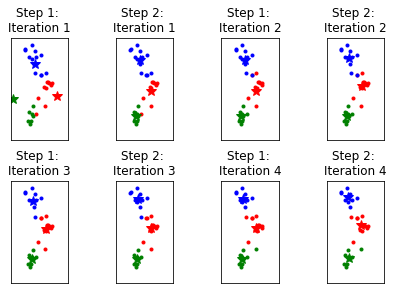

In [14]:
# load the data
data = np.load('data/X.npz')
X = data['X']
centers = data['centers'] 

# run k-means
cluster_assignments, updated_centers = k_means(3, X, centers, update_assignments, update_parameters, n_iter=4)

If the functions you completed above are working properly, you should see a figure containing a subplot of the output from steps (1) and (2) for four iterations of the algorithm. This plot should give you a sense of how the algorithm progresses over time. The data points are each assigned to one of three colors corresponding to their current cluster label. The cluster centers are plotted as stars.

---

## Part D (1 point)

Now that we have assigned cluster labels to each datapoint, let's investigate how we should classify a _new_ object (which we can see is a Shih-Tzu):

![](images/maddie.png)

<div class="alert alert-success">Complete the function template in `assign_new_object` to determine the appropriate cluster label for this new object.</div>

<div class="alert alert-warning">**N.B.** To complete the function, you will need to compute the distance between each cluster center and the new observation. Use the `distance` function from Part A.</div>

In [15]:
def assign_new_object(new_object, updated_centers):
    """
    Returns the cluster label (number) for new_object using k-means 
    clustering.
    
    Parameters
    ----------
    new_object : numpy array of shape (2,)
        The (x,y) coordinates of a new object to be classified
        
    updated_centers : numpy array of shape (num_clusters,2)
        An array containing the updated (x,y) coordinates for 
        each cluster center
        
    Returns
    -------
    label : int
       The cluster label assignment for new_object. This is a
       number between 0 and and (num_clusters - 1).
    """
    # YOUR CODE HERE
    d = []
    for c in updated_centers:
        d.append(distance(new_object, c))
    return d.index(min(d))

In [16]:
# add your own test cases here!


In [17]:
"""Check assign_new_object computes the correct values"""
from nose.tools import assert_equal

# validate update_assignments using different values
centers1 = np.array([[ 3.17014624,  2.42738134], [ 2.90932354,  4.26426491]])
assert_equal(assign_new_object(np.array([0, 1]), centers1), 0)
assert_equal(assign_new_object(np.array([1, 0]), centers1), 0)
assert_equal(assign_new_object(np.array([3, 2]), centers1), 0)
assert_equal(assign_new_object(np.array([2, 4]), centers1), 1)

centers2 = np.array([[ 3.170146,  2.427381], [ 3.109456,  1.902395], [ 2.964183,  1.827484]])
assert_equal(assign_new_object(np.array([0, 1]), centers2), 2)
assert_equal(assign_new_object(np.array([1, 0]), centers2), 2)
assert_equal(assign_new_object(np.array([3, 2]), centers2), 1)
assert_equal(assign_new_object(np.array([2, 4]), centers2), 0)

# check that it uses distance
old_distance = distance
del distance
try:
    update_assignments(2, X, np.array([[3, 2], [1, 4]]))
except NameError:
    pass
else:
    raise AssertionError("assign_new_object does not call distance")
finally:
    distance = old_distance
    del old_distance

print("Success!")

Success!


---

## Part E (1.5 points)

Let's go ahead and rerun $k$-means, to make sure we have the correct variables set:

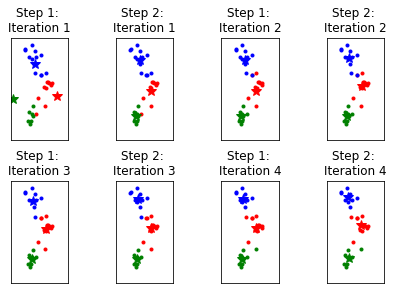

In [18]:
# load the edata
data = np.load('data/X.npz')
X = data['X']
centers = data['centers'] 

# run k-means
cluster_assignments, updated_centers = k_means(3, X, centers, update_assignments, update_parameters, n_iter=4)

Once you've implemented `assign_new_object`, give it a spin on the image of the Shih-Tzu:

In [19]:
new_object = np.array([3.3, 3.5]) # image coordinates
label = assign_new_object(new_object, updated_centers)
print ('The new object was assigned to cluster: '+ str(label))

The new object was assigned to cluster: 0


Finally, we can visualize this result against the true assignments using the helper function `plot_final`:

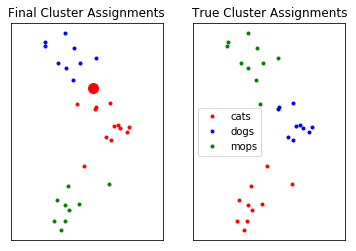

In [20]:
plot_final(X, cluster_assignments, updated_centers, new_object, assign_new_object)

<div class="alert alert-danger">
When interpreting these plots, don't worry if the coloring differs between the two solutions; what matters is whether $k$-means identifies the same cluster boundaries as are shown in the true clusters. This is because k-means can't determine the identity of each cluster label, only the groupings of the clusters themselves.</div> 

<div class="alert alert-success">Did the algorithm correctly identify the Shih-Tzu? A single word-response is fine. (**0.25 points**)</div>

Yes. It identified the Shih-Tzu as part of the dog cluster.

<div class="alert alert-success">Do you notice any differences between the true clusters and those identified via $k$-means? Write a few sentences commenting on any differences you found and why these differences might exist. (**1.25 points**)</div>

In the *k*-means cluster, the very top red data point was classified in the red cluster, whereas in the true cluster, this datapoint would have been classified in the green cluster (the bottom cluster), it was therefore classsified as a dog in the *k*-means cluster, and a cat in the true cluster. Another difference I found was in the true cluster, the bottom-most green datapoint was actually part of the red cluster in the *k*-means cluster. It was classified as a mop in the true cluster, and a dog in the *k*-means cluster. 

---

Before turning this problem in remember to do the following steps:

1. **Restart the kernel** (Kernel$\rightarrow$Restart)
2. **Run all cells** (Cell$\rightarrow$Run All)
3. **Save** (File$\rightarrow$Save and Checkpoint)

<div class="alert alert-danger">After you have completed these three steps, ensure that the following cell has printed "No errors". If it has <b>not</b> printed "No errors", then your code has a bug in it and has thrown an error! Make sure you fix this error before turning in your problem set.</div>

In [21]:
print("No errors!")

No errors!
